In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#lendo base de dados
clientes_bruto = pd.read_csv('../data/clientes.csv', sep=',', encoding='utf-8')

In [ ]:
#analisando como esta a base de dados
clientes_bruto.head(5)

,order_id,customer_id,order_date,order_value,category,bought_again_90d
0,1,103,2024-01-04,66.75,Books,0
1,2,180,2024-08-17,214.41,Electronics,0
2,3,93,2024-07-07,304.60,Books,0
3,4,15,2024-02-29,298.12,Fashion,1
4,5,107,2024-09-04,338.06,Sports,0


In [ ]:
#analisando quantas linhas e colunas tem a base de dados
clientes_bruto.shape

(1000, 6)

In [ ]:
#analisando quantos nulos existem na base de dados
clientes_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          1000 non-null   int64  
 1   customer_id       1000 non-null   int64  
 2   order_date        1000 non-null   object 
 3   order_value       1000 non-null   float64
 4   category          1000 non-null   object 
 5   bought_again_90d  1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [25]:
clientes_bruto.select_dtypes("object").describe().transpose()

,count,unique,top,freq
order_date,1000,535,2023-11-14,8
category,1000,5,Home,212


In [26]:
clientes_bruto.select_dtypes("float64").describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_value,1000.0,256.67118,137.456104,20.09,133.7425,257.96,375.7575,498.6


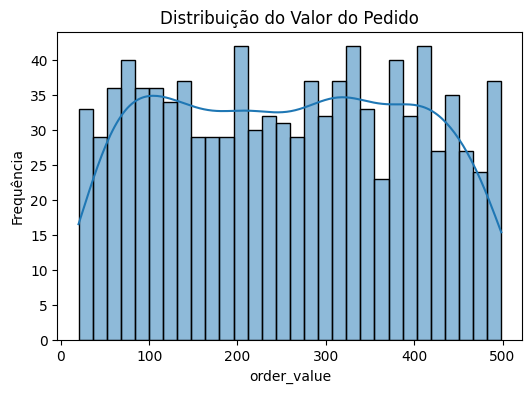

In [ ]:
#grafico para analisar a distribuição do valor dos pedidos
plt.figure(figsize=(6, 4))
sns.histplot(clientes_bruto['order_value'], bins=30, kde=True)
plt.title('Distribuição do Valor do Pedido')
plt.xlabel('order_value')
plt.ylabel('Frequência')
plt.show()

In [32]:
missing = clientes_bruto.isnull().sum()
print('Valores faltantes por coluna:')
print(missing)

Valores faltantes por coluna:
order_id            0
customer_id         0
order_date          0
order_value         0
category            0
bought_again_90d    0
dtype: int64


In [33]:
# Explorar variáveis categóricas (ex: customer_id, category)
print(clientes_bruto['customer_id'].value_counts().head(10))
print(clientes_bruto['category'].value_counts())


190    13
99     13
161    11
113    11
90     10
144    10
147    10
145    10
160     9
111     9
Name: customer_id, dtype: int64
Home           212
Electronics    211
Sports         197
Books          196
Fashion        184
Name: category, dtype: int64


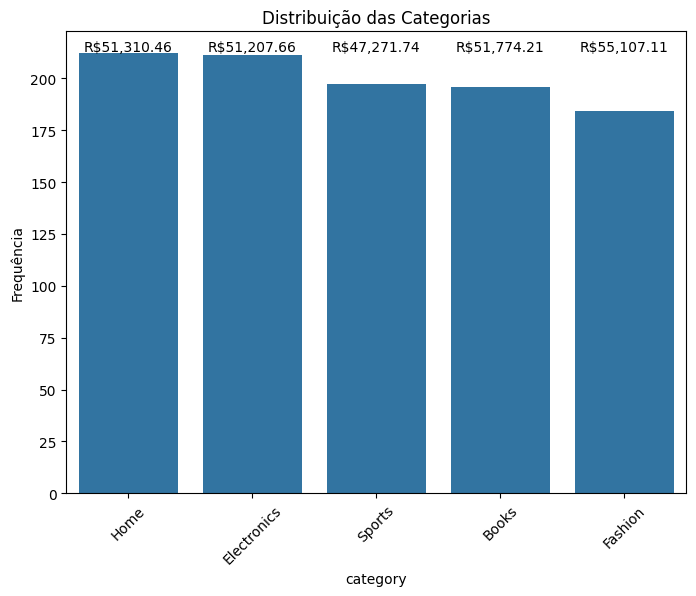

In [ ]:
#grafico para analisar a frequencia e valor vendido por categoria 
plt.figure(figsize=(8, 6))
sns.countplot(data=clientes_bruto, x='category', order=clientes_bruto['category'].value_counts().index)
plt.title('Distribuição das Categorias')
plt.xlabel('category')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Adiciona a quantidade de valor vendido por categoria
for i, category in enumerate(clientes_bruto['category'].unique()):
    valor_vendido = clientes_bruto[clientes_bruto['category'] == category]['order_value'].sum()
    plt.text(i, clientes_bruto['category'].value_counts().max() + 1, f'R${valor_vendido:,.2f}', ha='center')

plt.show()

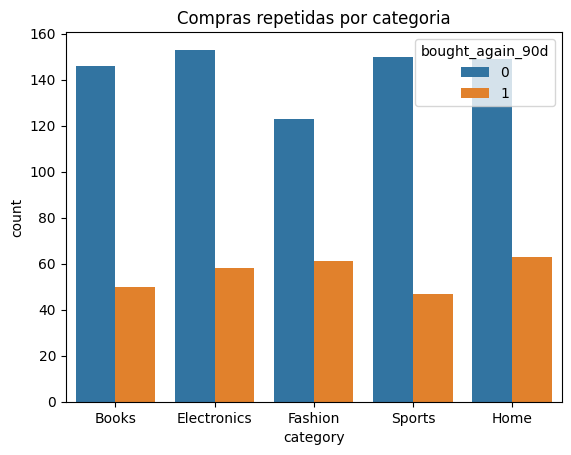

In [35]:
# Explorar relação entre categoria e target
sns.countplot(x='category', hue='bought_again_90d', data=clientes_bruto)
plt.title('Compras repetidas por categoria')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16780\1272871787.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='bought_again_90d', data=clientes_bruto, ci=None)


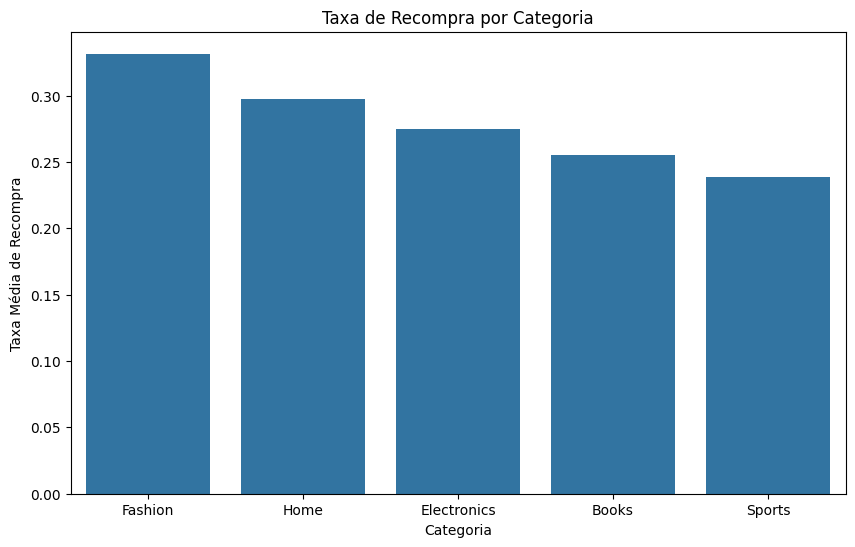

In [ ]:
#grafico para analisar a taxa de recompra por categoria
plt.figure(figsize=(10,6))
sns.barplot(x='category', y='bought_again_90d', data=clientes_bruto, ci=None)
plt.title('Taxa de Recompra por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Taxa Média de Recompra')
plt.show()


In [ ]:
#analisar quais anos temos na base de dados
clientes_bruto['order_date'] = pd.to_datetime(clientes_bruto['order_date'])
print(clientes_bruto['order_date'].dt.year.unique())

[2024 2023]


In [ ]:
#analisar quantas compras por ano temos na base de dados
print(clientes_bruto['order_date'].dt.year.value_counts().head(5))

2023    521
2024    479
Name: order_date, dtype: int64


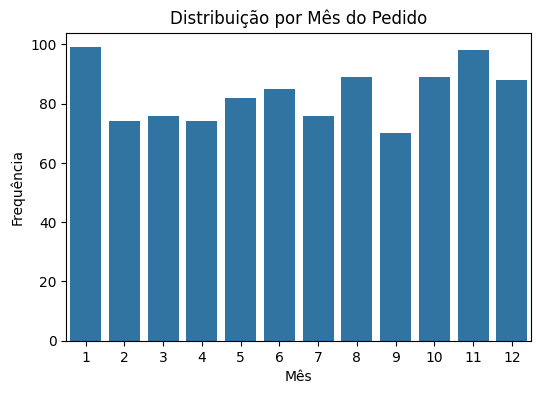

In [ ]:
#quantidade total de compras por mes
clientes_bruto['order_date'] = pd.to_datetime(clientes_bruto['order_date'])
clientes_bruto['order_month'] = clientes_bruto['order_date'].dt.month

plt.figure(figsize=(6, 4))
sns.countplot(data=clientes_bruto, x='order_month')
plt.title('Distribuição por Mês do Pedido')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16780\3485359556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['order_month'] = df_2023['order_date'].dt.month
C:\Users\USER\AppData\Local\Temp\ipykernel_16780\3485359556.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['order_month'] = df_2024['order_date'].dt.month


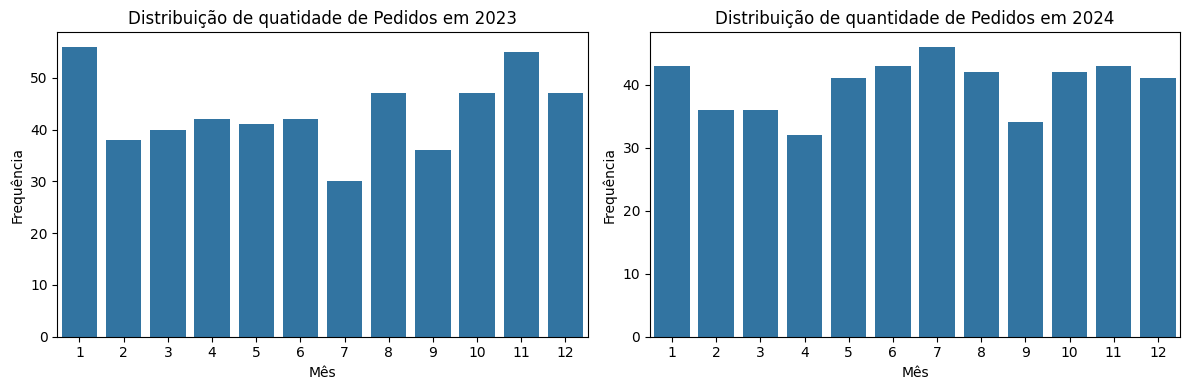

In [66]:
anos = [2023, 2024]

df_2023 = clientes_bruto[clientes_bruto['order_date'].dt.year == 2023]
df_2023['order_month'] = df_2023['order_date'].dt.month

df_2024 = clientes_bruto[clientes_bruto['order_date'].dt.year == 2024]
df_2024['order_month'] = df_2024['order_date'].dt.month

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df_2023, x='order_month', ax=axs[0])
axs[0].set_title('Distribuição de quatidade de Pedidos em 2023')
axs[0].set_xlabel('Mês')
axs[0].set_ylabel('Frequência')

sns.countplot(data=df_2024, x='order_month', ax=axs[1])
axs[1].set_title('Distribuição de quantidade de Pedidos em 2024')
axs[1].set_xlabel('Mês')
axs[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

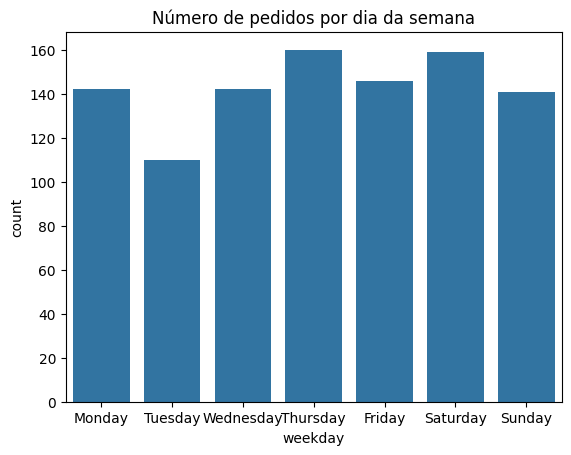

In [40]:
# Análise temporal: extrair mês e dia da semana da order_date
clientes_bruto['order_date'] = pd.to_datetime(clientes_bruto['order_date'], errors='coerce')
clientes_bruto['weekday'] = clientes_bruto['order_date'].dt.day_name()

sns.countplot(x='weekday', data=clientes_bruto,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Número de pedidos por dia da semana')
plt.show()

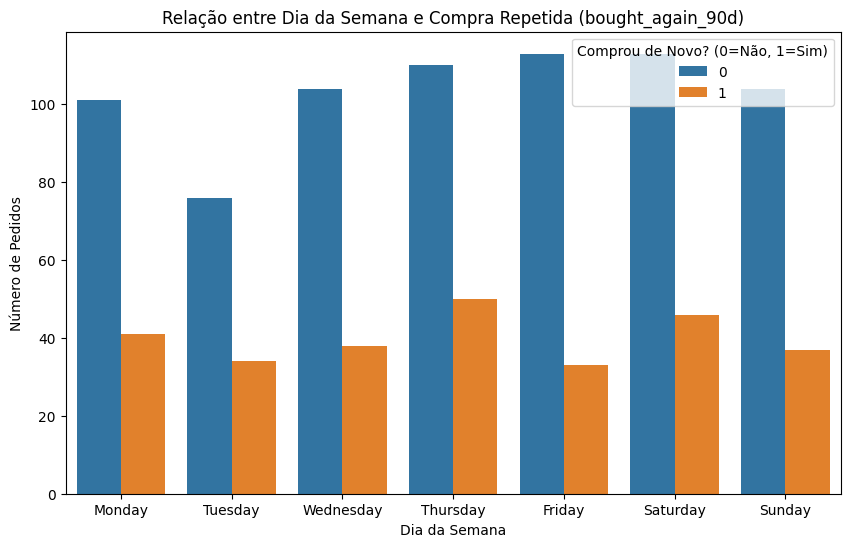

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Se ainda não tiver feito, extrair dia da semana
clientes_bruto['weekday'] = clientes_bruto['order_date'].dt.day_name()

# Plotar relação entre dia da semana e bought_again_90d
plt.figure(figsize=(10,6))
sns.countplot(x='weekday', hue='bought_again_90d', data=clientes_bruto,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Relação entre Dia da Semana e Compra Repetida (bought_again_90d)')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Pedidos')
plt.legend(title='Comprou de Novo? (0=Não, 1=Sim)')
plt.show()


In [42]:
# Percentual de compra repetida por dia da semana
resumo = clientes_bruto.groupby('weekday')['bought_again_90d'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
print(resumo)


weekday
Monday       0.288732
Tuesday      0.309091
Wednesday    0.267606
Thursday     0.312500
Friday       0.226027
Saturday     0.289308
Sunday       0.262411
Name: bought_again_90d, dtype: float64


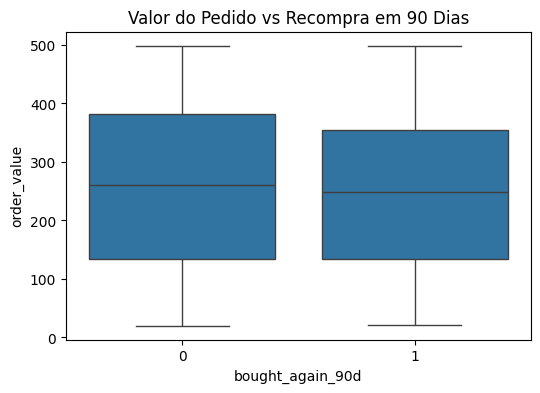

In [43]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=clientes_bruto, x='bought_again_90d', y='order_value')
plt.title('Valor do Pedido vs Recompra em 90 Dias')
plt.xlabel('bought_again_90d')
plt.ylabel('order_value')
plt.show()

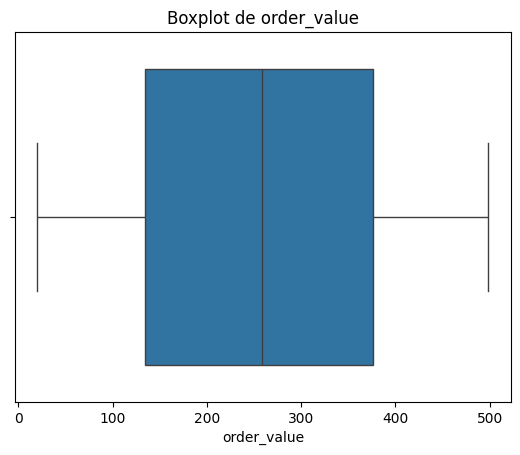

In [44]:
# Boxplot para detectar outliers
sns.boxplot(x=clientes_bruto['order_value'])
plt.title('Boxplot de order_value')
plt.show()

criando novas features

In [ ]:
ticket_medio = clientes_bruto.groupby('customer_id')['order_value'].mean().reset_index()

# A coluna do ticket_medio chama-se 'order_value' aqui (sem renomear)

# Fazer merge com clientes_bruto — pandas automaticamente vai adicionar o sufixo _y se a coluna já existir
clientes_bruto = clientes_bruto.merge(ticket_medio, on='customer_id', how='left', suffixes=('', '_avg'))

# Agora clientes_bruto tem:
# 'order_value' (original) e 'order_value_avg' (a média por cliente)

In [54]:
total_gasto = clientes_bruto.groupby('customer_id')['order_value'].sum().reset_index()
clientes_bruto = clientes_bruto.merge(total_gasto.rename(columns={'order_value': 'total_gasto_cliente'}), on='customer_id', how='left')


In [55]:
total_pedidos = clientes_bruto.groupby('customer_id')['order_id'].count().reset_index()
clientes_bruto = clientes_bruto.merge(total_pedidos.rename(columns={'order_id': 'total_pedidos_cliente'}), on='customer_id', how='left')


In [56]:
clientes_bruto = clientes_bruto.sort_values(['customer_id', 'order_date'])
clientes_bruto['diff_days'] = clientes_bruto.groupby('customer_id')['order_date'].diff().dt.days
freq_media = clientes_bruto.groupby('customer_id')['diff_days'].mean().reset_index()
clientes_bruto = clientes_bruto.merge(freq_media.rename(columns={'diff_days': 'freq_media_dias_cliente'}), on='customer_id', how='left')


In [57]:
num_categorias = clientes_bruto.groupby('customer_id')['category'].nunique().reset_index()
clientes_bruto = clientes_bruto.merge(num_categorias.rename(columns={'category': 'num_categorias_cliente'}), on='customer_id', how='left')


In [58]:
clientes_bruto.head(5)

,order_id,customer_id,order_date,order_value,category,bought_again_90d,order_month,weekday,order_value_avg,total_gasto_cliente,total_pedidos_cliente,diff_days,freq_media_dias_cliente,num_categorias_cliente
0,928,1,2023-03-28,124.88,Fashion,0,3,Tuesday,224.0275,1792.22,8,NaN,89.571429,5
1,138,1,2023-06-28,363.44,Home,0,6,Wednesday,224.0275,1792.22,8,92.0,89.571429,5
2,742,1,2023-08-10,170.32,Electronics,1,8,Thursday,224.0275,1792.22,8,43.0,89.571429,5
3,491,1,2024-01-09,149.28,Electronics,0,1,Tuesday,224.0275,1792.22,8,152.0,89.571429,5
4,826,1,2024-01-22,218.13,Electronics,0,1,Monday,224.0275,1792.22,8,13.0,89.571429,5


C:\Users\USER\AppData\Local\Temp\ipykernel_16780\3525985724.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = clientes_bruto.corr()


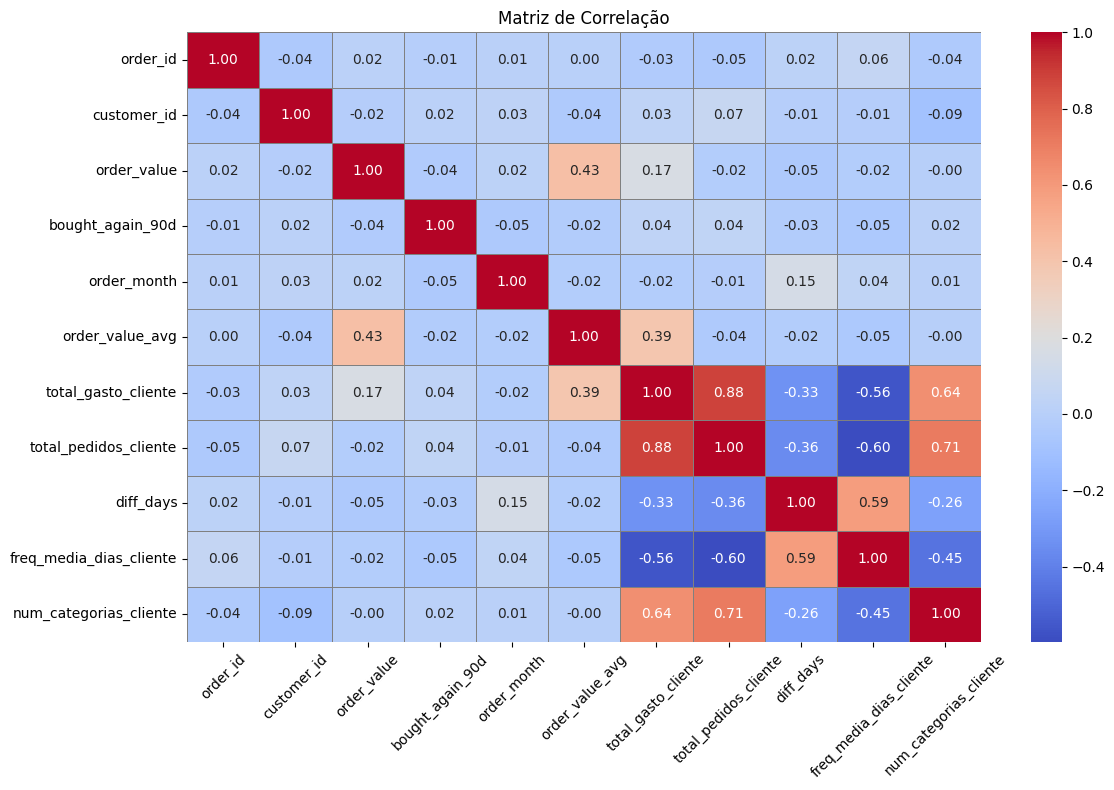

In [ ]:
#correlacionado colunas
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlação só com variáveis numéricas
corr = clientes_bruto.corr()

# Definir tamanho maior da figura para mais espaço
plt.figure(figsize=(12, 8))

# Plotar heatmap com anotações e formato com 2 casas decimais
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='gray')

plt.title('Matriz de Correlação')
plt.xticks(rotation=45)  # Rotacionar labels do eixo x para melhorar leitura
plt.yticks(rotation=0)   # Labels do eixo y sem rotação
plt.tight_layout()       # Ajustar layout para não cortar nada
plt.show()


In [ ]:
#salvando a base de dados com as novas features
clientes_bruto.to_csv('../data/clientes_com_features.csv', index=False)
